In [2]:
import osmnx as ox
import pandas as pd

# Define the bounding box or location
place_name = "San Francisco, California, USA"  # Example area
tags = {'amenity': ['post_box', 'bicycle_parking', 'bench', 'fast_food', 'waste_basket']}  # Fetch all amenities

# Fetch amenities in the defined area
gdf = ox.features_from_place(place_name, tags)

# Extract latitude and longitude from the geometries
gdf['latitude'] = gdf.geometry.centroid.y
gdf['longitude'] = gdf.geometry.centroid.x

# Filter for relevant columns
amenities_lat_lon_df = gdf[['amenity', 'name', 'latitude', 'longitude']]

# Display the DataFrame
print(amenities_lat_lon_df)

# Save to a CSV file (optional)
amenities_lat_lon_df.to_csv("amenities_with_lat_long.csv", index=False)

                           amenity            name   latitude   longitude
element_type osmid                                                       
node         61680526     post_box             NaN  37.770046 -122.448534
             265689505    post_box             NaN  37.749487 -122.408708
             266903722    post_box             NaN  37.763169 -122.410314
             266903723    post_box             NaN  37.754490 -122.401539
             266903734    post_box             NaN  37.760782 -122.404006
...                            ...             ...        ...         ...
way          1213210774  fast_food  Tycoon Kitchen  37.788391 -122.397967
             1293537276      bench             NaN  37.807658 -122.472643
             1324192089      bench             NaN  37.783079 -122.478253
             1326151484      bench             NaN  37.735297 -122.376198
             1326151485      bench             NaN  37.735397 -122.376233

[6861 rows x 4 columns]


/var/folders/8n/7kcjbmm92wv4f2ldlmlw82r40000gn/T/ipykernel_10635/889329746.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['latitude'] = gdf.geometry.centroid.y
/var/folders/8n/7kcjbmm92wv4f2ldlmlw82r40000gn/T/ipykernel_10635/889329746.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['longitude'] = gdf.geometry.centroid.x


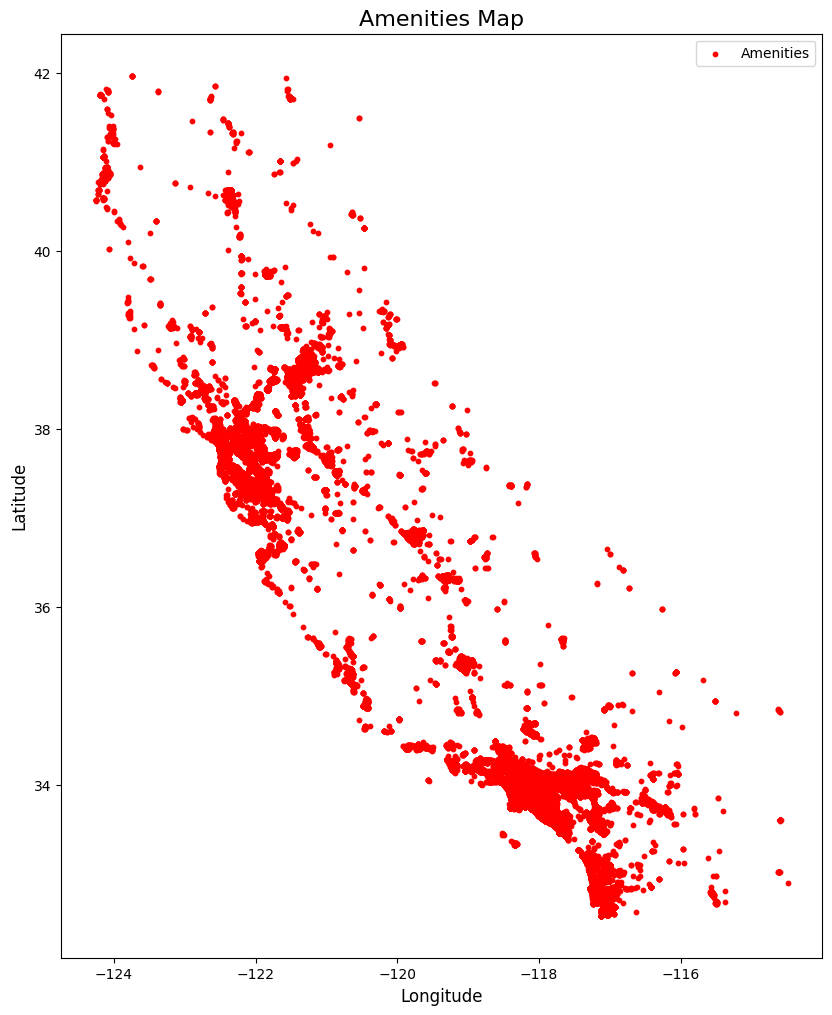

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# # Load the DataFrame (from the previous script)
# amenities_df = pd.read_csv("amenities_with_lat_long.csv")  # Replace with your DataFrame variable if not saved

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(amenities_lat_lon_df['longitude'], amenities_lat_lon_df['latitude'])]
gdf = gpd.GeoDataFrame(amenities_lat_lon_df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

# Plot the amenities
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the points from the GeoDataFrame
gdf.plot(ax=ax, color='red', markersize=10, label='Amenities')

# Add labels and styling
ax.set_title("Amenities Map", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()

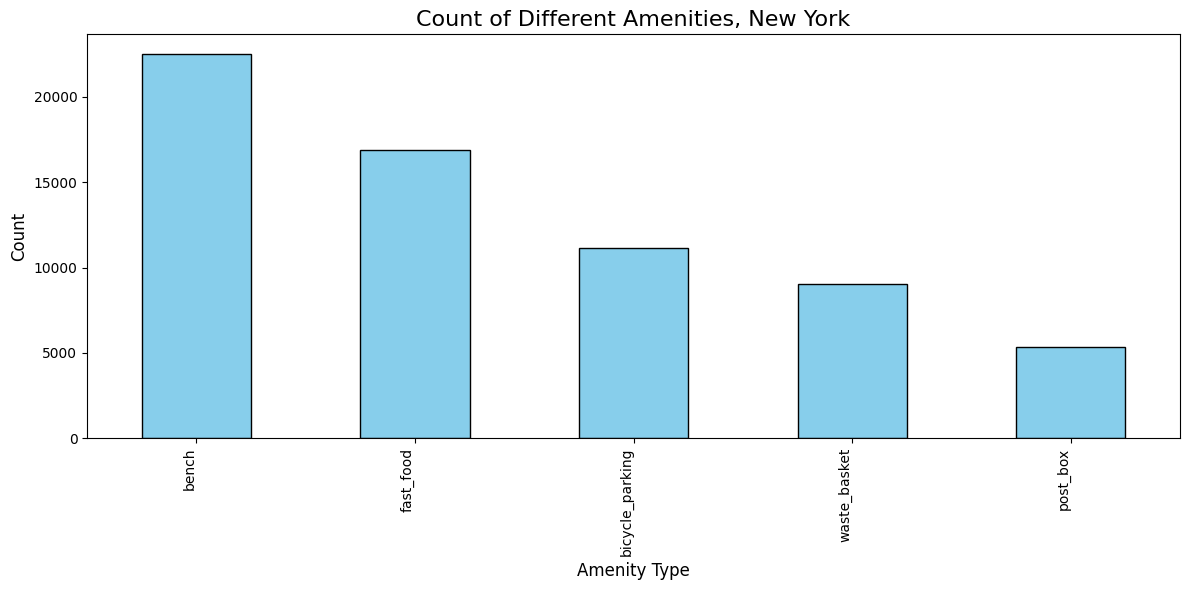

In [ ]:

# Group by 'amenity' and count occurrences
amenity_counts = amenities_lat_lon_df['amenity'].value_counts()

top_10_amenities = amenity_counts.head(20)
# Plot a bar chart
plt.figure(figsize=(12, 6))
top_10_amenities.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Count of Different Amenities, New York", fontsize=16)
plt.xlabel("Amenity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()